## Concatenation of all CSV's to one csv.

In [299]:
import pandas as pd
import glob
import os


In [300]:
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

path = os.path.join(current_dir, "Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012")
print(f"Full path: {path}")
print(f"Full path: {path}")
if not os.path.isdir(path):
    raise FileNotFoundError(f"The directory '{path}' does not exist.")

csv_pattern_lower = os.path.join(path, "NSE_data_all_stocks_*.csv")
csv_files = glob.glob(csv_pattern_lower)

df_list = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df_list.append(df)
        print(f"Successfully read: {file} with {len(df)} rows.")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check if any DataFrames were successfully read
if not df_list:
    raise ValueError("No DataFrames were loaded. Please check the CSV files for readability.")

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True, sort=False)

# Create a new directory for combined output
combined_output_dir = os.path.join(current_dir, "Combined_NSE_Data")
if not os.path.exists(combined_output_dir):
    os.makedirs(combined_output_dir)
    print(f"Created new directory: {combined_output_dir}")

output_file = os.path.join(combined_output_dir, "NSE_data_all_stocks_2007_2012_combined.csv")
combined_df.to_csv(output_file, index=False)

print(f"All CSV files have been successfully combined into '{output_file}'.")

Current working directory: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression
Full path: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012
Full path: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012\NSE_data_all_stocks_2007.csv with 10608 rows.
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012\NSE_data_all_stocks_2008.csv with 10583 rows.
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_bas

In [301]:
data = pd.read_csv(output_file)

limuru_data = data[data['CODE'] == 'LIMT']
print(limuru_data.head())


           DATE  CODE        NAME 12m Low 12m High Day Low Day High Day Price  \
92     1/4/2007  LIMT  Limuru Tea     400      500     350      350       350   
1972   3/6/2007  LIMT  Limuru Tea     400      500     400      400       400   
2263  3/15/2007  LIMT  Limuru Tea     400      500     400      400       400   
2305  3/16/2007  LIMT  Limuru Tea     400      500     400      400       400   
2428  3/21/2007  LIMT  Limuru Tea     400      500     400      400       400   

     Previous Change Change% Volume Adjust Date Adjusted  
92        350      -       -    100    175  NaN      NaN  
1972      350     50  12.50%    100    200  NaN      NaN  
2263      400      -       -    500    200  NaN      NaN  
2305      400      -       -    100    200  NaN      NaN  
2428      400      -       -    100    200  NaN      NaN  


C:\Users\HP\AppData\Local\Temp\ipykernel_504\3842580086.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file)


In [302]:
data_size = len(data['CODE'])
print(f"The total number of rows in the dataset is {data_size}")


The total number of rows in the dataset is 81504


In [303]:
print(limuru_data)

             DATE  CODE        NAME 12m Low 12m High Day Low Day High  \
92       1/4/2007  LIMT  Limuru Tea     400      500     350      350   
1972     3/6/2007  LIMT  Limuru Tea     400      500     400      400   
2263    3/15/2007  LIMT  Limuru Tea     400      500     400      400   
2305    3/16/2007  LIMT  Limuru Tea     400      500     400      400   
2428    3/21/2007  LIMT  Limuru Tea     400      500     400      400   
...           ...   ...         ...     ...      ...     ...      ...   
81244  12/21/2012  LIMT  Limuru Tea     400      500     430      430   
81308  12/24/2012  LIMT  Limuru Tea     400      500     430      430   
81372  12/27/2012  LIMT  Limuru Tea     400      500     430      430   
81436  12/28/2012  LIMT  Limuru Tea     400      500     430      430   
81500  12/31/2012  LIMT  Limuru Tea     400      500     430      430   

      Day Price Previous Change Change% Volume Adjust Date Adjusted  
92          350      350      -       -    100    175

# 📈 Predicting Limuru Stock Using Linear Regression 📊

In this project, I am using **Linear Regression** to predict the stock price of **Limuru**. The **target variable** for the model is the **Day Price** 💹, which represents the stock's price for a given day.

### 🔑 Key Points:
- **Model Type**: Linear Regression 🤖
- **Target Variable**: Day Price 💵
- **Objective**: Predict the stock price on any given day, helping stock buyers make informed decisions 🛍️.

This model will leverage historical stock data 📅 to predict the future price movement 🔮, offering valuable insights into Limuru's stock performance 🚀.


In [304]:
missing_values = limuru_data.isnull().sum()
print("🔍 Missing values in each column:")
print(missing_values)

🔍 Missing values in each column:
DATE           5
CODE           0
NAME           0
12m Low        0
12m High       0
Day Low        0
Day High       0
Day Price      0
Previous       0
Change         0
Change%        0
Volume         0
Adjust         5
Date         990
Adjusted     990
dtype: int64


In [305]:
limuru_data['DATE'] = pd.to_datetime(limuru_data['DATE'], format='%m/%d/%Y', errors='coerce')

# Extract year and create a new 'Year' column
limuru_data['Year'] = limuru_data['DATE'].dt.year
limuru_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 92 to 81500
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       990 non-null    datetime64[ns]
 1   CODE       995 non-null    object        
 2   NAME       995 non-null    object        
 3   12m Low    995 non-null    object        
 4   12m High   995 non-null    object        
 5   Day Low    995 non-null    object        
 6   Day High   995 non-null    object        
 7   Day Price  995 non-null    object        
 8   Previous   995 non-null    object        
 9   Change     995 non-null    object        
 10  Change%    995 non-null    object        
 11  Volume     995 non-null    object        
 12  Adjust     990 non-null    object        
 13  Date       5 non-null      object        
 14  Adjusted   5 non-null      object        
 15  Year       990 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(14)
m

C:\Users\HP\AppData\Local\Temp\ipykernel_504\441026628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limuru_data['DATE'] = pd.to_datetime(limuru_data['DATE'], format='%m/%d/%Y', errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_504\441026628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limuru_data['Year'] = limuru_data['DATE'].dt.year


In [306]:
limuru_data = limuru_data.fillna(method='ffill') 
print("\n✅ Data after forward filling missing values:")
print(data.info())



✅ Data after forward filling missing values:


C:\Users\HP\AppData\Local\Temp\ipykernel_504\2513055157.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  limuru_data = limuru_data.fillna(method='ffill')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81504 entries, 0 to 81503
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       70921 non-null  object
 1   CODE       81504 non-null  object
 2   NAME       81456 non-null  object
 3   12m Low    81504 non-null  object
 4   12m High   81504 non-null  object
 5   Day Low    81504 non-null  object
 6   Day High   81504 non-null  object
 7   Day Price  81504 non-null  object
 8   Previous   81504 non-null  object
 9   Change     81504 non-null  object
 10  Change%    81504 non-null  object
 11  Volume     81504 non-null  object
 12  Adjust     70921 non-null  object
 13  Date       10583 non-null  object
 14  Adjusted   10583 non-null  object
dtypes: object(15)
memory usage: 9.3+ MB
None


In [307]:
limuru_data = limuru_data.fillna(method='ffill') 
print("\n✅ Data after forward filling missing values:")
print(data.info())



✅ Data after forward filling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81504 entries, 0 to 81503
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       70921 non-null  object
 1   CODE       81504 non-null  object
 2   NAME       81456 non-null  object
 3   12m Low    81504 non-null  object
 4   12m High   81504 non-null  object
 5   Day Low    81504 non-null  object
 6   Day High   81504 non-null  object
 7   Day Price  81504 non-null  object
 8   Previous   81504 non-null  object
 9   Change     81504 non-null  object
 10  Change%    81504 non-null  object
 11  Volume     81504 non-null  object
 12  Adjust     70921 non-null  object
 13  Date       10583 non-null  object
 14  Adjusted   10583 non-null  object
dtypes: object(15)
memory usage: 9.3+ MB
None


C:\Users\HP\AppData\Local\Temp\ipykernel_504\2513055157.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  limuru_data = limuru_data.fillna(method='ffill')


In [308]:
missing_values = limuru_data.isnull().sum()
print("🔍 Missing values in each column:")
print(missing_values)


🔍 Missing values in each column:
DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
Date         7
Adjusted     7
Year         0
dtype: int64


In [309]:
limuru_data.duplicated().sum()

2

In [310]:
limuru_data.drop_duplicates()


,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Date,Adjusted,Year
92,2007-01-04,LIMT,Limuru Tea,400,500,350,350,350,350,-,-,100,175,NaN,NaN,2007.0
1972,2007-03-06,LIMT,Limuru Tea,400,500,400,400,400,350,50,12.50%,100,200,NaN,NaN,2007.0
2263,2007-03-15,LIMT,Limuru Tea,400,500,400,400,400,400,-,-,500,200,NaN,NaN,2007.0
2305,2007-03-16,LIMT,Limuru Tea,400,500,400,400,400,400,-,-,100,200,NaN,NaN,2007.0
2428,2007-03-21,LIMT,Limuru Tea,400,500,400,400,400,400,-,-,100,200,NaN,NaN,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81244,2012-12-21,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-,12/4/2008,152.5,2012.0
81308,2012-12-24,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-,12/4/2008,152.5,2012.0
81372,2012-12-27,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-,12/4/2008,152.5,2012.0
81436,2012-12-28,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-,12/4/2008,152.5,2012.0


In [311]:
limuru_data.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
Date         7
Adjusted     7
Year         0
dtype: int64

In [312]:
limuru_data['DATE'] = limuru_data['DATE'].fillna(method='ffill')
print(limuru_data["DATE"].isnull().sum())

0


C:\Users\HP\AppData\Local\Temp\ipykernel_504\2483635251.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  limuru_data['DATE'] = limuru_data['DATE'].fillna(method='ffill')


In [313]:
columns_to_drop = ['Date','Change','Change%','Adjust', 'Adjusted','NAME']
limuru_data = limuru_data.drop(columns=columns_to_drop)
limuru_data

,DATE,CODE,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume,Year
92,2007-01-04,LIMT,400,500,350,350,350,350,100,2007.0
1972,2007-03-06,LIMT,400,500,400,400,400,350,100,2007.0
2263,2007-03-15,LIMT,400,500,400,400,400,400,500,2007.0
2305,2007-03-16,LIMT,400,500,400,400,400,400,100,2007.0
2428,2007-03-21,LIMT,400,500,400,400,400,400,100,2007.0
...,...,...,...,...,...,...,...,...,...,...
81244,2012-12-21,LIMT,400,500,430,430,430,430,0,2012.0
81308,2012-12-24,LIMT,400,500,430,430,430,430,0,2012.0
81372,2012-12-27,LIMT,400,500,430,430,430,430,0,2012.0
81436,2012-12-28,LIMT,400,500,430,430,430,430,0,2012.0


In [314]:
limuru_data.isnull().sum()

DATE         0
CODE         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Volume       0
Year         0
dtype: int64

In [315]:
limuru_data['Previous'] = limuru_data['Previous'].fillna(limuru_data['Day Price'])

In [316]:
numeric_columns = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price',
                    'Previous','Volume']
for col in numeric_columns:
    limuru_data[col] = pd.to_numeric(
        limuru_data[col].replace('[^0-9.-]', '', regex=True), errors='coerce'
    )
limuru_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 92 to 81500
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       995 non-null    datetime64[ns]
 1   CODE       995 non-null    object        
 2   12m Low    995 non-null    int64         
 3   12m High   995 non-null    int64         
 4   Day Low    995 non-null    int64         
 5   Day High   995 non-null    int64         
 6   Day Price  995 non-null    int64         
 7   Previous   995 non-null    int64         
 8   Volume     995 non-null    int64         
 9   Year       995 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 85.5+ KB


## **Data Visualization: Trends Present in Limuru Stock Price** 📈  

Now that we have our dataset cleaned and preprocessed, we can analyze the distribution of stock prices, time series trends, and other related graphs to visualize the data effectively.  


In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

In [318]:
fig_size = (15, 6)

###  Box Plot for Price Distribution
---

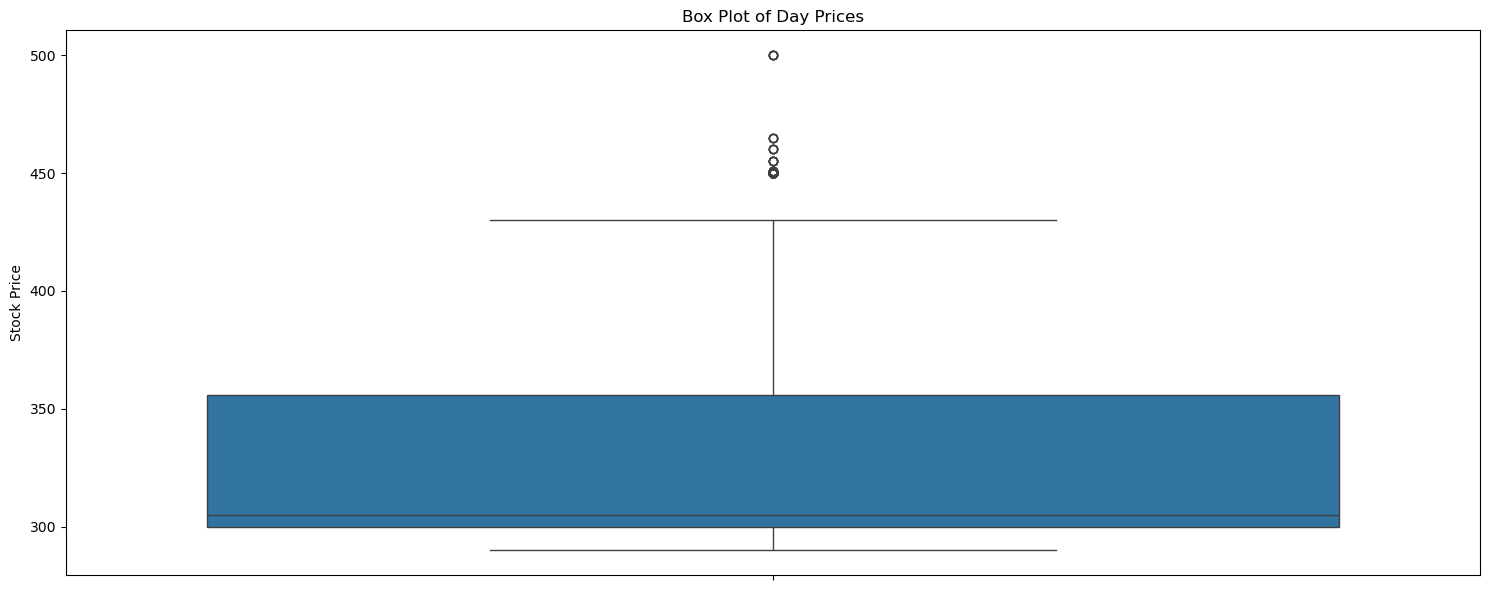

In [319]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day Price'])
plt.title('Box Plot of Day Prices')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

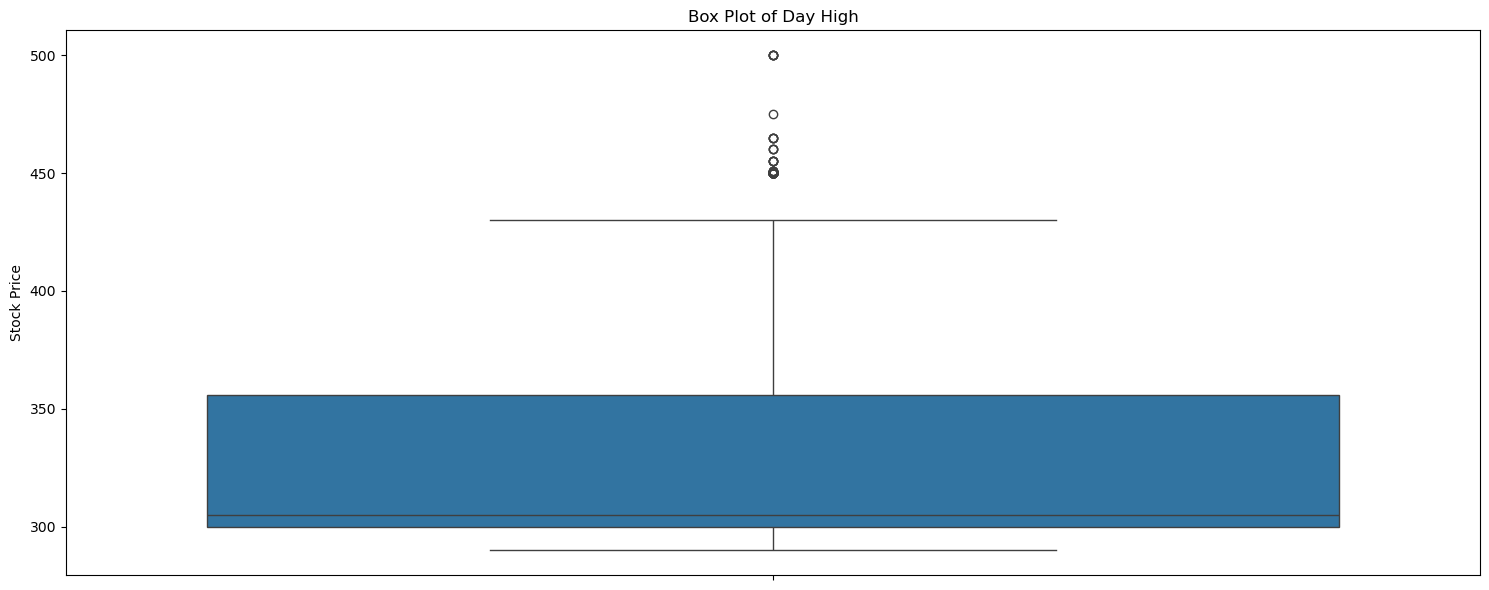

In [320]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day High'])
plt.title('Box Plot of Day High')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

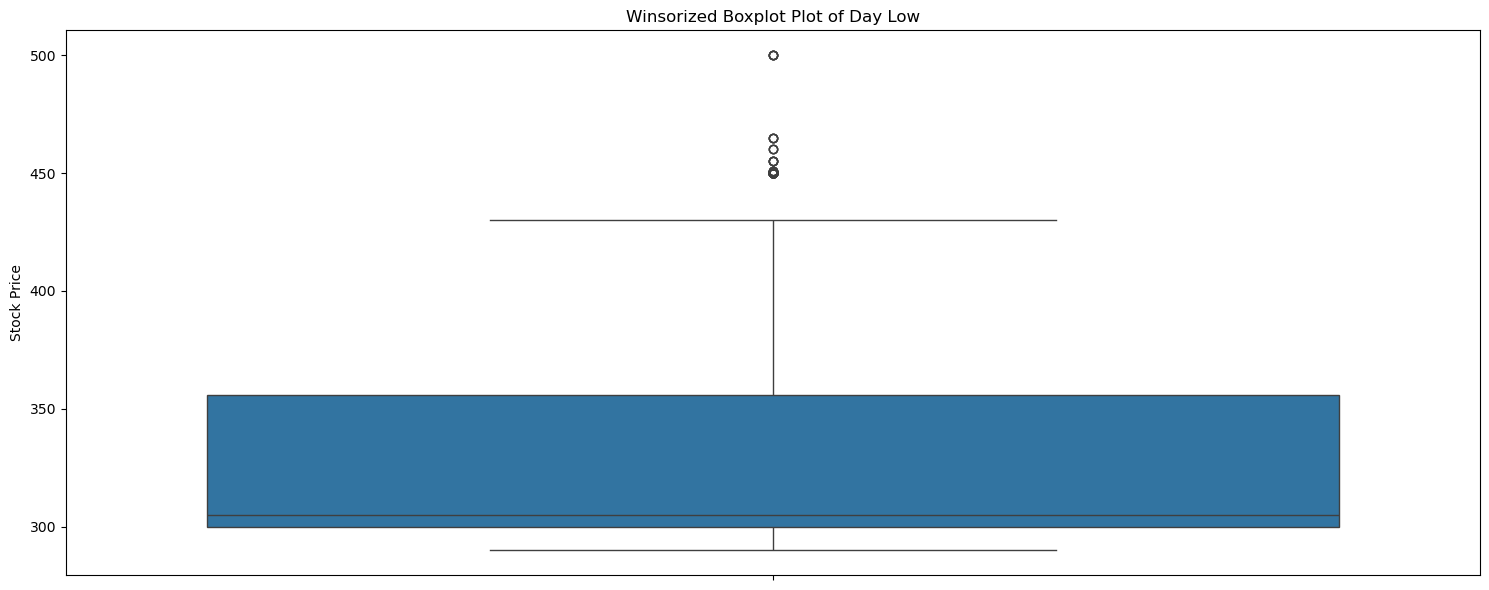

In [321]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day Low'])
plt.title('Winsorized Boxplot Plot of Day Low')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

### Handling Outliers.
---

In [322]:
from scipy.stats import mstats

In [323]:
def handle_outliers(data, columns, limits=(0.05, 0.05)):
    for col in columns:
        data[col] = mstats.winsorize(data[col], limits=limits)
    return data
numeric_columns = ['Day Price', 'Day High', 'Day Low', '12m High', '12m Low']

limuru_data = handle_outliers(limuru_data, numeric_columns, limits=(0.2, 0.2))

print("Outliers have been handled using winsorization.")

# Summary statistics after handling outliers
print("🔍 Summary Statistics After Handling Outliers:")
print(limuru_data[numeric_columns].describe())


Outliers have been handled using winsorization.
🔍 Summary Statistics After Handling Outliers:
        Day Price    Day High     Day Low  12m High  12m Low
count  995.000000  995.000000  995.000000     995.0    995.0
mean   330.084422  330.133668  330.008040     500.0    400.0
std     39.871813   39.894166   39.832293       0.0      0.0
min    300.000000  300.000000  300.000000     500.0    400.0
25%    300.000000  300.000000  300.000000     500.0    400.0
50%    305.000000  305.000000  305.000000     500.0    400.0
75%    356.000000  356.000000  356.000000     500.0    400.0
max    400.000000  400.000000  400.000000     500.0    400.0


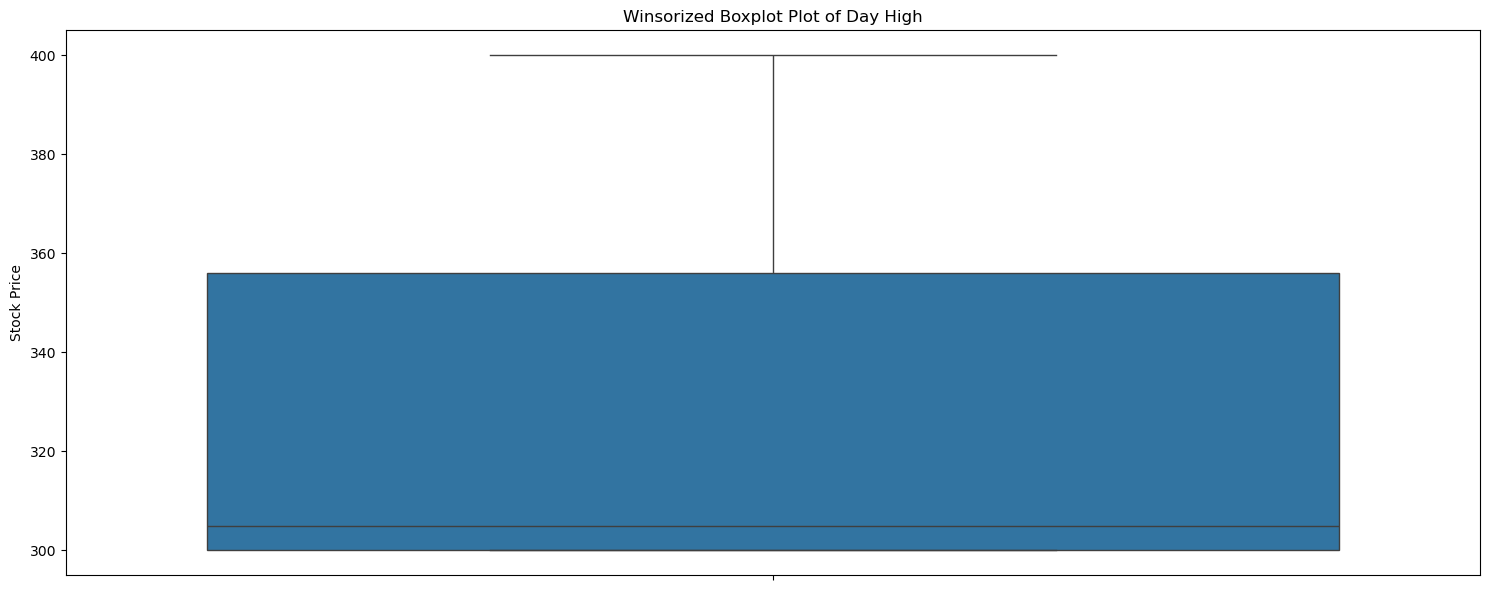

In [324]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day High'])
plt.title('Winsorized Boxplot Plot of Day High')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

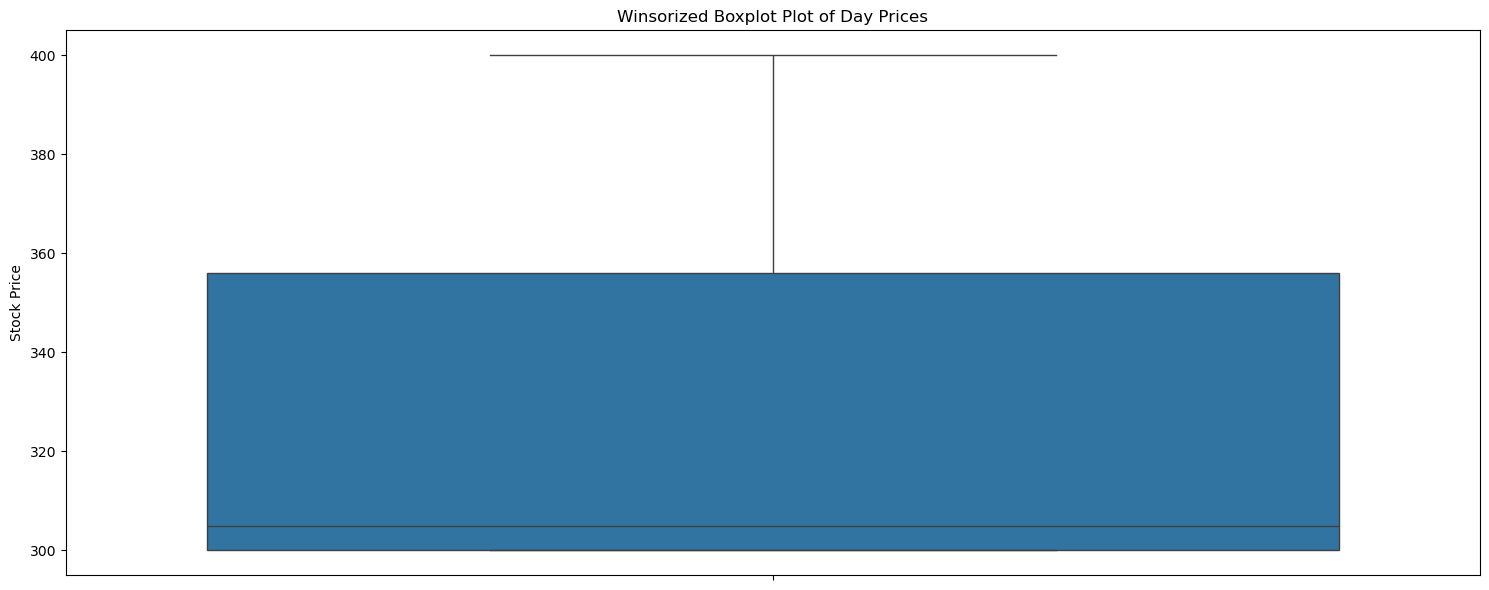

In [325]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day Price'])
plt.title('Winsorized Boxplot Plot of Day Prices')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

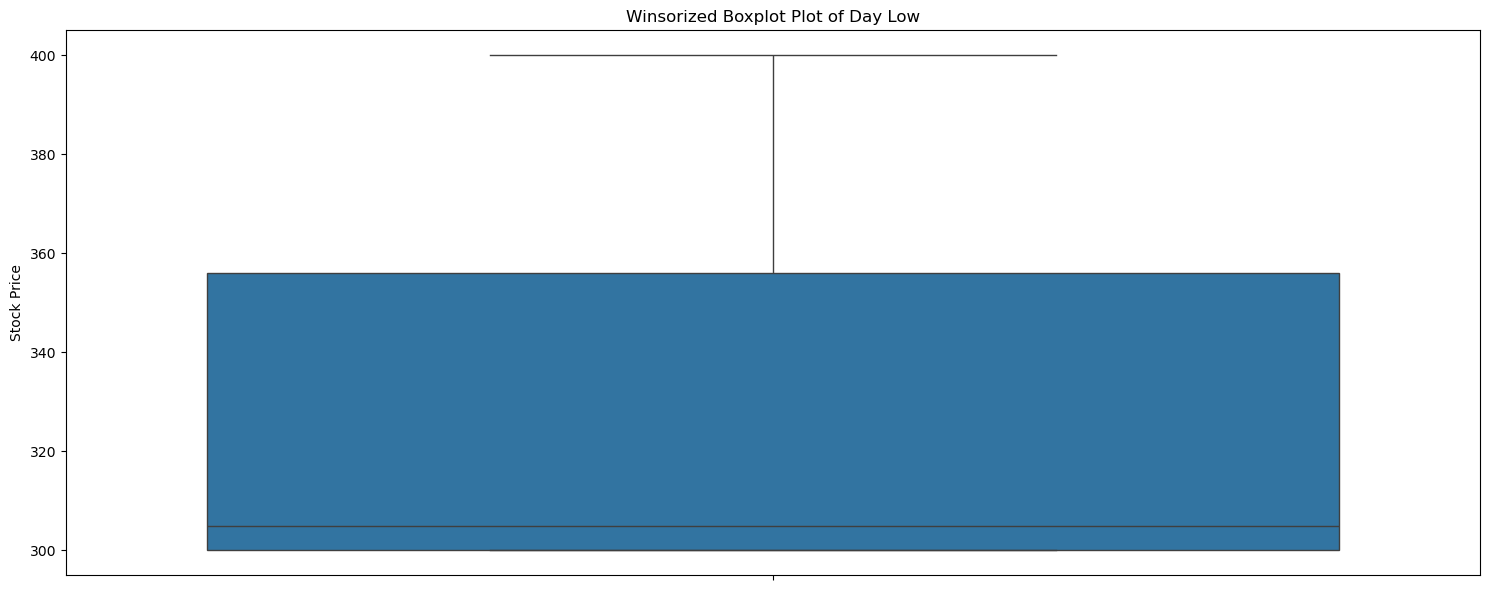

In [326]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day Low'])
plt.title('Winsorized Boxplot Plot of Day Low')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

###  Distribution of Stock Prices

---

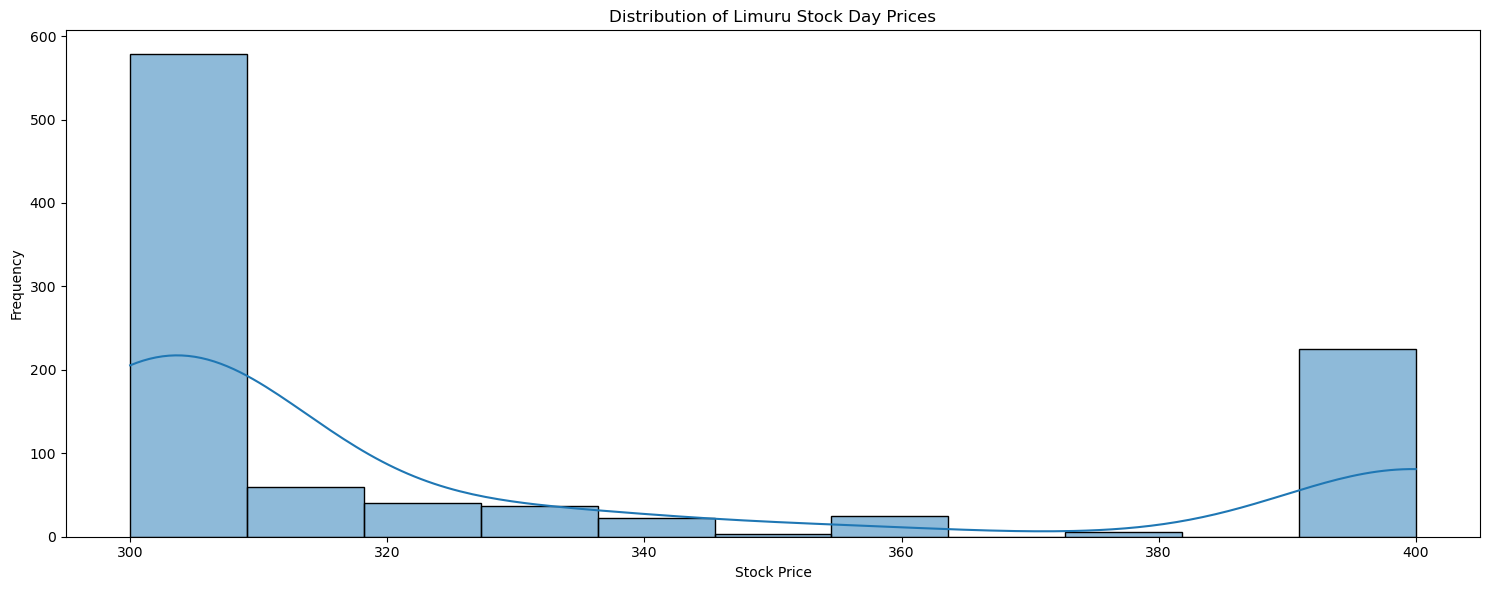

In [327]:
plt.figure(figsize=fig_size)
sns.histplot(data=limuru_data, x='Day Price', kde=True)
plt.title('Distribution of Limuru Stock Day Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

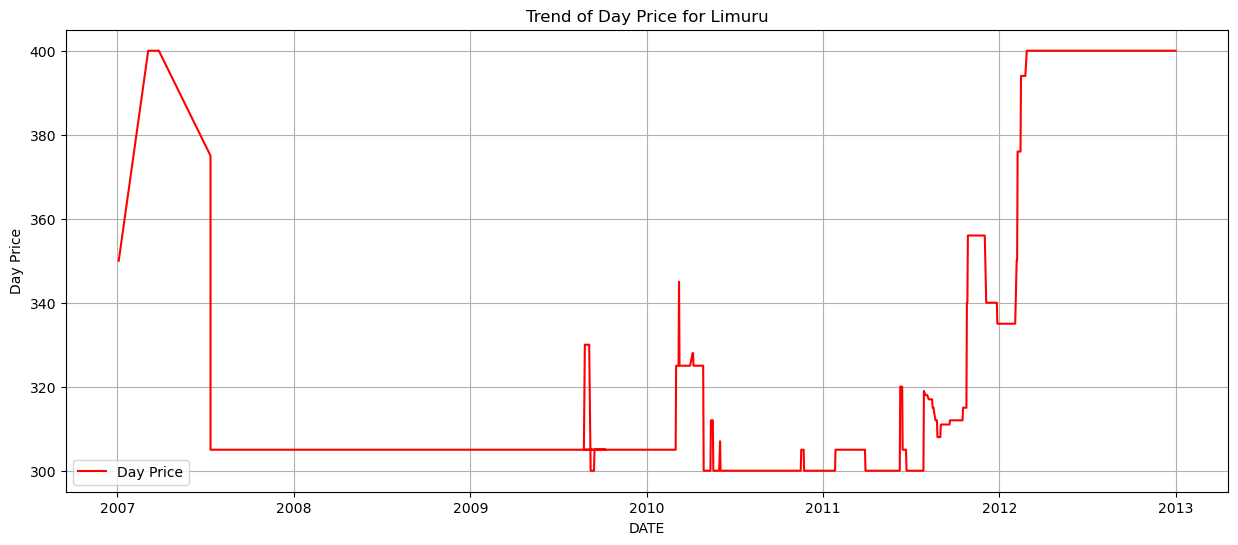

In [328]:
plt.figure(figsize=fig_size)
plt.plot(limuru_data['DATE'], limuru_data['Day Price'], label='Day Price', color='Red')
plt.title('Trend of Day Price for Limuru')
plt.xlabel('DATE')
plt.ylabel('Day Price')
plt.legend()
plt.grid()
plt.show()


### 🚀 **Training and Testing Data: The Journey Begins** 🧑‍🏫

Now that we have our dataset cleaned and preprocessed, it's time to move on to —**Training** and **Testing** our model! 🎯

---




In [329]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Data Encoding.
---

In [330]:
label_encoder = LabelEncoder()
limuru_data['CODE'] = label_encoder.fit_transform(limuru_data['CODE'])
limuru_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 92 to 81500
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       995 non-null    datetime64[ns]
 1   CODE       995 non-null    int32         
 2   12m Low    995 non-null    int64         
 3   12m High   995 non-null    int64         
 4   Day Low    995 non-null    int64         
 5   Day High   995 non-null    int64         
 6   Day Price  995 non-null    int64         
 7   Previous   995 non-null    int64         
 8   Volume     995 non-null    int64         
 9   Year       995 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7)
memory usage: 81.6 KB


#### Data Feature Scaling Process ⚖️  
---  

In [331]:
numeric_columns = limuru_data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
limuru_data[numeric_columns] = scaler.fit_transform(limuru_data[numeric_columns])

# Verify the scaled features
limuru_data[numeric_columns].head(15)

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume,Year
92,0.0,0.0,0.502156,0.498226,0.499741,0.223543,-0.090083,-2.992797
1972,0.0,0.0,1.758050,1.752173,1.754391,0.223543,-0.090083,-2.992797
2263,0.0,0.0,1.758050,1.752173,1.754391,1.133407,-0.014171,-2.992797
2305,0.0,0.0,1.758050,1.752173,1.754391,1.133407,-0.090083,-2.992797
2428,0.0,0.0,1.758050,1.752173,1.754391,1.133407,-0.090083,-2.992797
2632,0.0,0.0,1.758050,1.752173,1.754391,1.133407,-0.090083,-2.992797
5699,0.0,0.0,1.130103,1.125199,1.127066,1.133407,-0.052127,-2.992797
12601,0.0,0.0,0.200741,0.197279,0.198625,0.678475,-0.090083,-2.992797
16457,0.0,0.0,0.200741,0.197279,0.198625,0.005176,-0.090083,-2.992797
18946,0.0,0.0,0.200741,0.197279,0.198625,0.005176,-0.090083,-2.992797


#### Train-Test Split Process ✂️  
---  

In [332]:
data_size = limuru_data['Day Price'].size
print(f"The total number of rows in 'Day Price' is: {data_size}")


The total number of rows in 'Day Price' is: 995


In [333]:
X = limuru_data.drop(columns=['Day Price', 'DATE']) 
y = limuru_data['Day Price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [334]:
print(f"Training data (X_train) shape: {X_train.shape}")
print(f"Testing data (X_test) shape: {X_test.shape}")


Training data (X_train) shape: (796, 8)
Testing data (X_test) shape: (199, 8)


#### Linear Regression 📉  
---  

In [335]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [336]:
model_one = LinearRegression()
model_one.fit(X_train,y_train)


LinearRegression()

##### Predict on Training Data.
---

In [337]:
y_train_pred = model_one.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
print("Mean Squared Error (MSE):", train_mse)
print("R-squared (R²) Score:", r2_train)

Mean Squared Error (MSE): 6.745574025847616e-05
R-squared (R²) Score: 0.9999330981251041


##### Predict on Test Data.
---

In [338]:
import numpy as np

In [339]:
y_pred_test = model_one.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Mean Squared Error (MSE):", test_mse)
print("R-squared (R²) Score:", r2_test)

Mean Squared Error (MSE): 3.528419848715725e-07
R-squared (R²) Score: 0.9999996345306358


##### Graphical Display.
---

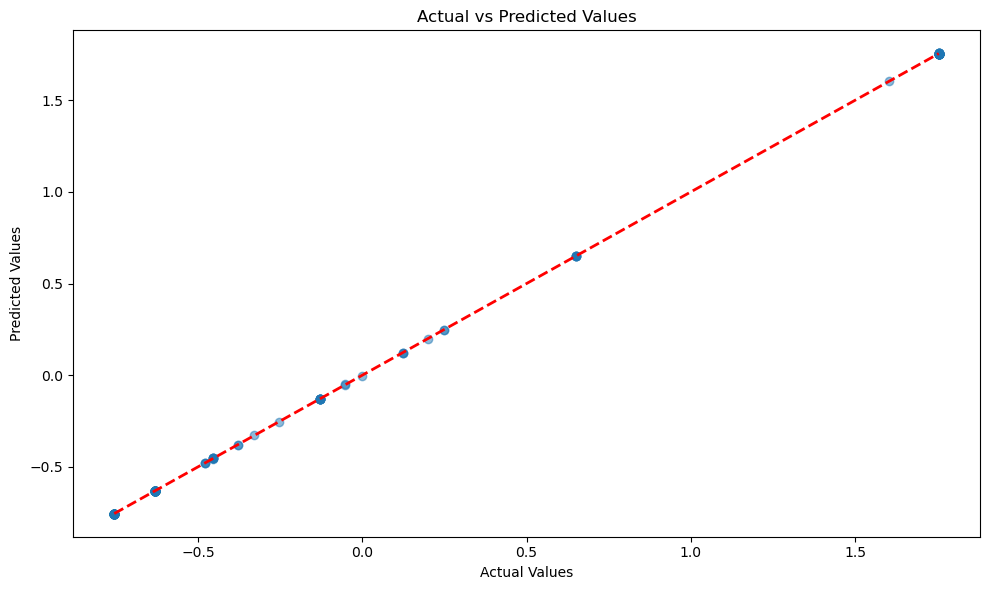

In [340]:
# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

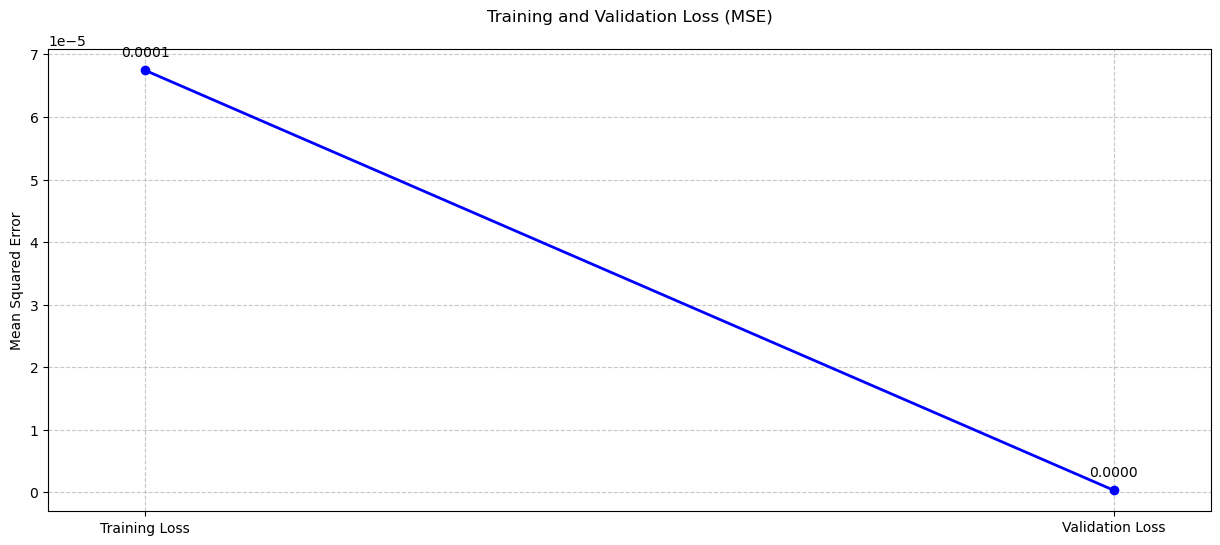

In [341]:
plt.clf()

loss_values = [train_mse, test_mse]
labels = ['Training Loss', 'Validation Loss']

plt.figure(figsize=fig_size)

plt.plot(labels, loss_values, marker='o', color='blue', linewidth=2)

plt.title('Training and Validation Loss (MSE)', fontsize=12, pad=20)
plt.ylabel('Mean Squared Error', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

for i, value in enumerate(loss_values):
    plt.annotate(f'{value:.4f}', 
                (i, value),
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.margins(x=0.1)
plt.show()

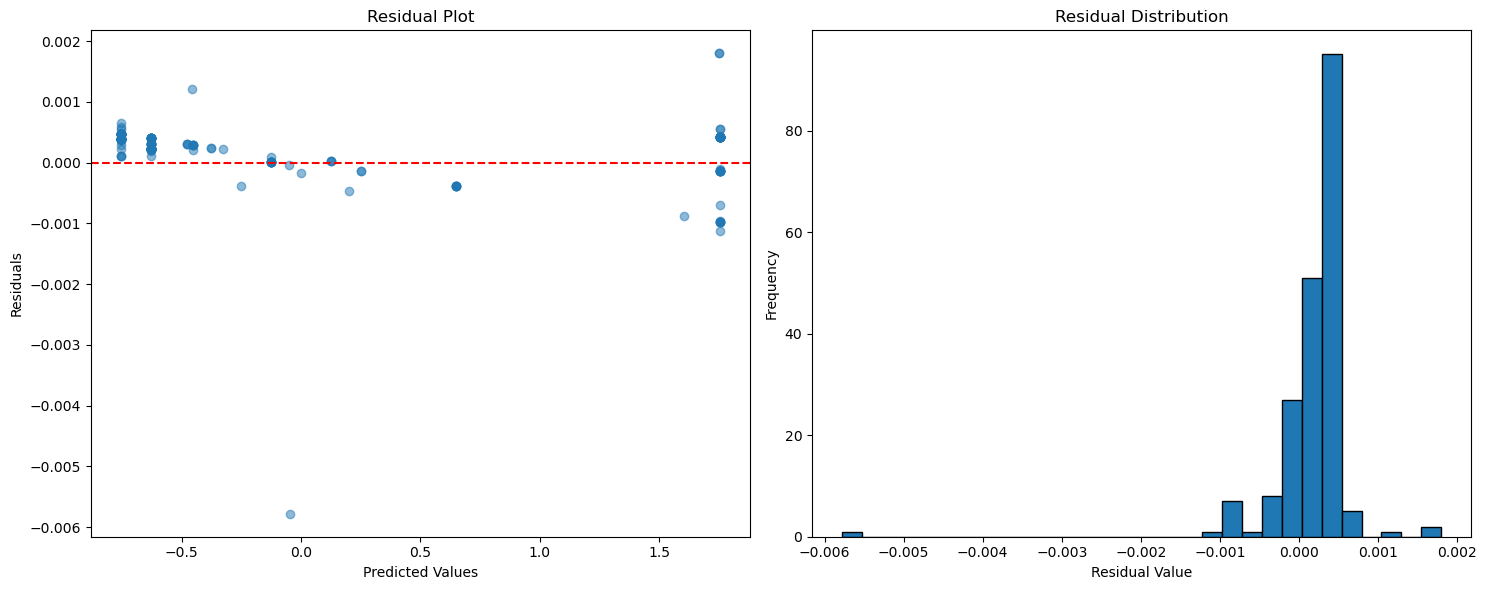


📉 Residual Statistics:
Mean of residuals: 0.000186
Standard deviation of residuals: 0.000564


In [342]:
# Calculate residuals
residuals = y_test - y_pred_test

# Plot residuals
plt.figure(figsize=fig_size)

# Residual plot
plt.subplot(121)
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')

# Residual distribution
plt.subplot(122)
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()

# Print residual statistics
print("\n📉 Residual Statistics:")
print(f"Mean of residuals: {np.mean(residuals):.6f}")
print(f"Standard deviation of residuals: {np.std(residuals):.6f}")

#### Building the Neural Network 🧠  
---  